#                                     
                                    Vehicle Price Prediction

                                          Navdeep Singh
                                          Patrick Copp

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV


sns.set_theme(style="ticks", color_codes=True)
warnings.filterwarnings("ignore")

In [2]:
# importing dataset

# This dataset has been downloaded from cardekho.com
# cardekho.com is India's leading car search venture that helps users buy cars that are right for them

# loading dataset
df=pd.read_csv('vehicle_dataset.csv')

In [3]:
# seeing how dataset looks like
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# Following are the feature set for the data
# Car_name - represent the car name
# Year - Year of the care
# Selling_Price - tells the resale value of current vehicle (currency -INR)
# Present_Price - tells the present price of vehicle (currency - INR)
# Kms_Driven - shows kilomeeters driven
# Fuel_Type - Petrol/Diesel/CNG
# Seller_Type - shows type of seller : Dealer/Individual
# Transmission - Manual / Automatic
# Owner - First, Second, Third owner etc.

# Converting prices from INR to CAD
# Coversion rate used here is 1 INR is 0.017 CAD
# Note conversion rate may differ but to make things simple 0.017 is used to convert INR to CAD
# All prices are in K units (thousands)

df["Selling_Price"] = df["Selling_Price"] * (100 * 0.017)
df["Present_Price"] = df["Present_Price"] * (100 * 0.017)

df.rename(columns = {'Selling_Price':'Selling_Price (CAD)',
                     'Present_Price':'Present_Price (CAD)'}, inplace = True)

df.head(10)

,Car_Name,Year,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.695,9.503,27000,Petrol,Dealer,Manual,0
1,sx4,2013,8.075,16.218,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,12.325,16.745,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.845,7.055,5200,Petrol,Dealer,Manual,0
4,swift,2014,7.820,11.679,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,15.725,16.711,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,11.475,13.804,18796,Petrol,Dealer,Manual,0
7,s cross,2015,11.050,14.637,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,14.875,15.113,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,12.665,15.164,42367,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
# Here we can see that name has no correlation with other data features
df.describe()

,Year,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,7.924203,12.968402,36947.205980,0.043189
std,2.891554,8.640780,14.694996,38886.883882,0.247915
min,2003.000000,0.170000,0.544000,500.000000,0.000000
25%,2012.000000,1.530000,2.040000,15000.000000,0.000000
50%,2014.000000,6.120000,10.880000,32000.000000,0.000000
75%,2016.000000,10.200000,16.830000,48767.000000,0.000000
max,2018.000000,59.500000,157.420000,500000.000000,3.000000


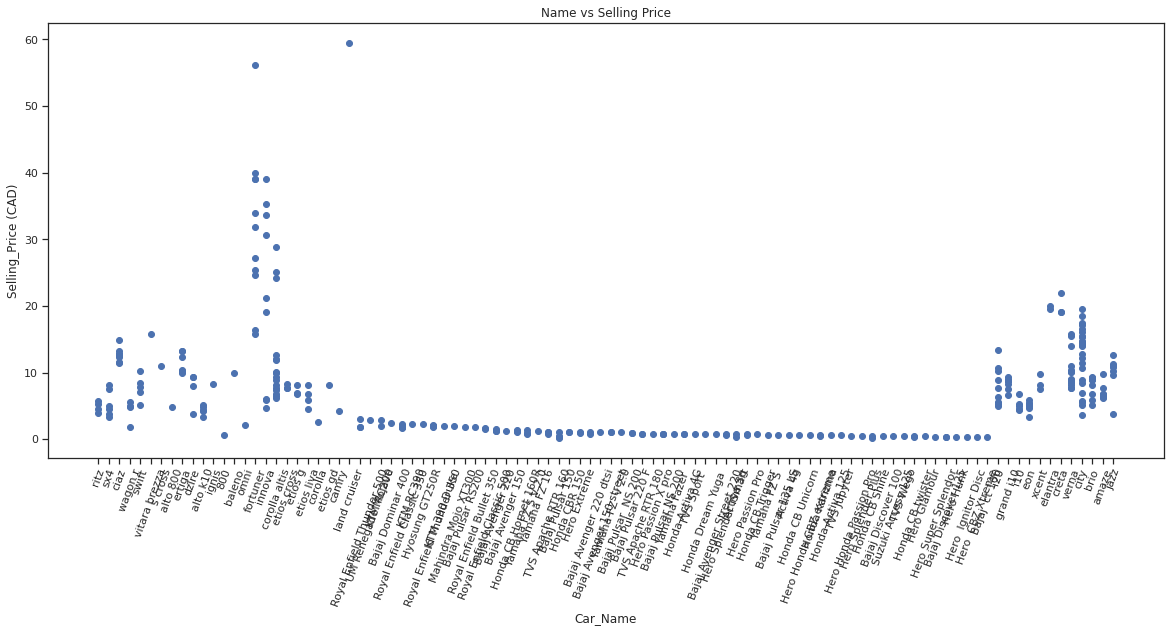

In [7]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.xticks(rotation=70)
plt.scatter(df['Car_Name'],df['Selling_Price (CAD)'])
# Add title and axis names
plt.title('Name vs Selling Price')
plt.xlabel('Car_Name')
plt.ylabel('Selling_Price (CAD)')
plt.show()

# Clearly there is no co-relation between car name and selling price

In [8]:
# Dropping of Car_Name label form the dataset
df=df[['Year','Selling_Price (CAD)','Present_Price (CAD)',
                  'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
df.head(10)

,Year,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.695,9.503,27000,Petrol,Dealer,Manual,0
1,2013,8.075,16.218,43000,Diesel,Dealer,Manual,0
2,2017,12.325,16.745,6900,Petrol,Dealer,Manual,0
3,2011,4.845,7.055,5200,Petrol,Dealer,Manual,0
4,2014,7.820,11.679,42450,Diesel,Dealer,Manual,0
5,2018,15.725,16.711,2071,Diesel,Dealer,Manual,0
6,2015,11.475,13.804,18796,Petrol,Dealer,Manual,0
7,2015,11.050,14.637,33429,Diesel,Dealer,Manual,0
8,2016,14.875,15.113,20273,Diesel,Dealer,Manual,0
9,2015,12.665,15.164,42367,Diesel,Dealer,Manual,0


In [9]:
# Now let's see the features - Transmission, Owner, Seller_Type, Fuel_Type

print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())

# checking any missing or null values and taking care of it.
df.isnull().sum()
# Note there are no null values

['Manual' 'Automatic']
[0 1 3]
['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']


Year                   0
Selling_Price (CAD)    0
Present_Price (CAD)    0
Kms_Driven             0
Fuel_Type              0
Seller_Type            0
Transmission           0
Owner                  0
dtype: int64

In [10]:
# Now let's add few more features to improve the dataset while preprocessing
df['Current_Year']=2021

df.head(10)

,Year,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,5.695,9.503,27000,Petrol,Dealer,Manual,0,2021
1,2013,8.075,16.218,43000,Diesel,Dealer,Manual,0,2021
2,2017,12.325,16.745,6900,Petrol,Dealer,Manual,0,2021
3,2011,4.845,7.055,5200,Petrol,Dealer,Manual,0,2021
4,2014,7.820,11.679,42450,Diesel,Dealer,Manual,0,2021
5,2018,15.725,16.711,2071,Diesel,Dealer,Manual,0,2021
6,2015,11.475,13.804,18796,Petrol,Dealer,Manual,0,2021
7,2015,11.050,14.637,33429,Diesel,Dealer,Manual,0,2021
8,2016,14.875,15.113,20273,Diesel,Dealer,Manual,0,2021
9,2015,12.665,15.164,42367,Diesel,Dealer,Manual,0,2021


In [11]:
# Calculating how old is the car (in years) and dropping off year of the car and current year
df['Old_Year'] = df['Current_Year'] - df['Year']
df.drop(['Year'],axis=1,inplace=True)
df.drop(['Current_Year'],axis=1,inplace=True)
df.head(10)

,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old_Year
0,5.695,9.503,27000,Petrol,Dealer,Manual,0,7
1,8.075,16.218,43000,Diesel,Dealer,Manual,0,8
2,12.325,16.745,6900,Petrol,Dealer,Manual,0,4
3,4.845,7.055,5200,Petrol,Dealer,Manual,0,10
4,7.820,11.679,42450,Diesel,Dealer,Manual,0,7
5,15.725,16.711,2071,Diesel,Dealer,Manual,0,3
6,11.475,13.804,18796,Petrol,Dealer,Manual,0,6
7,11.050,14.637,33429,Diesel,Dealer,Manual,0,6
8,14.875,15.113,20273,Diesel,Dealer,Manual,0,5
9,12.665,15.164,42367,Diesel,Dealer,Manual,0,6


In [12]:
# Convert categorical data into numerical - Transmission, Seller_Type, Fuel_Type
df=pd.get_dummies(df,drop_first=True)

In [13]:
# Let's compute pairwise correlation of all features and see if we further have to drop any features that
# impact our model

#Compute pairwise correlation of columns, excluding NA/null values
df.corr()

,Selling_Price (CAD),Present_Price (CAD),Kms_Driven,Owner,Old_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price (CAD),1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price (CAD),0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Old_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


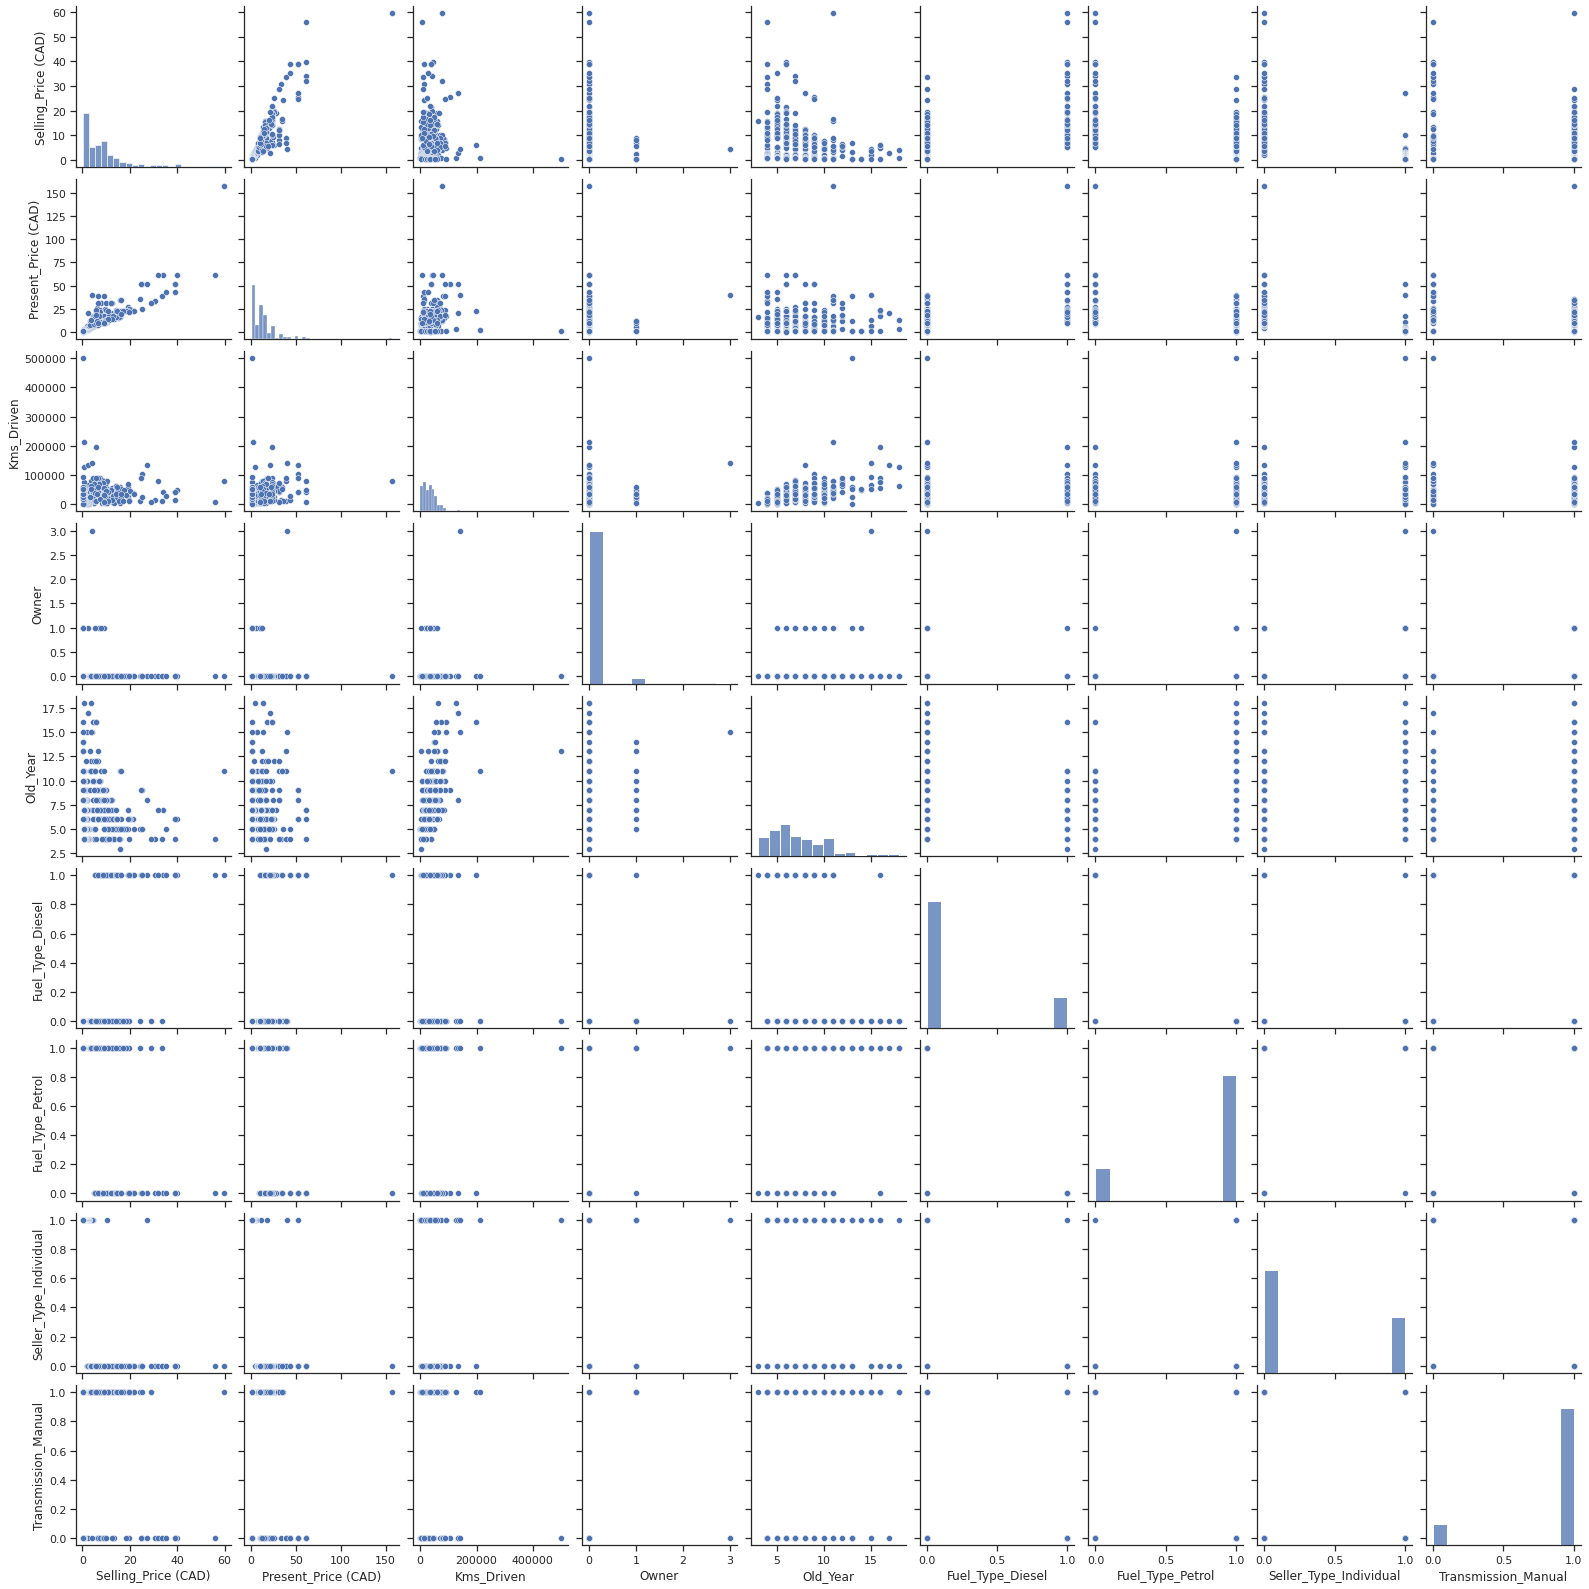

In [14]:
# Plotting a pairplot with each other (all features) - to see if features have correlation
sns.pairplot(df)

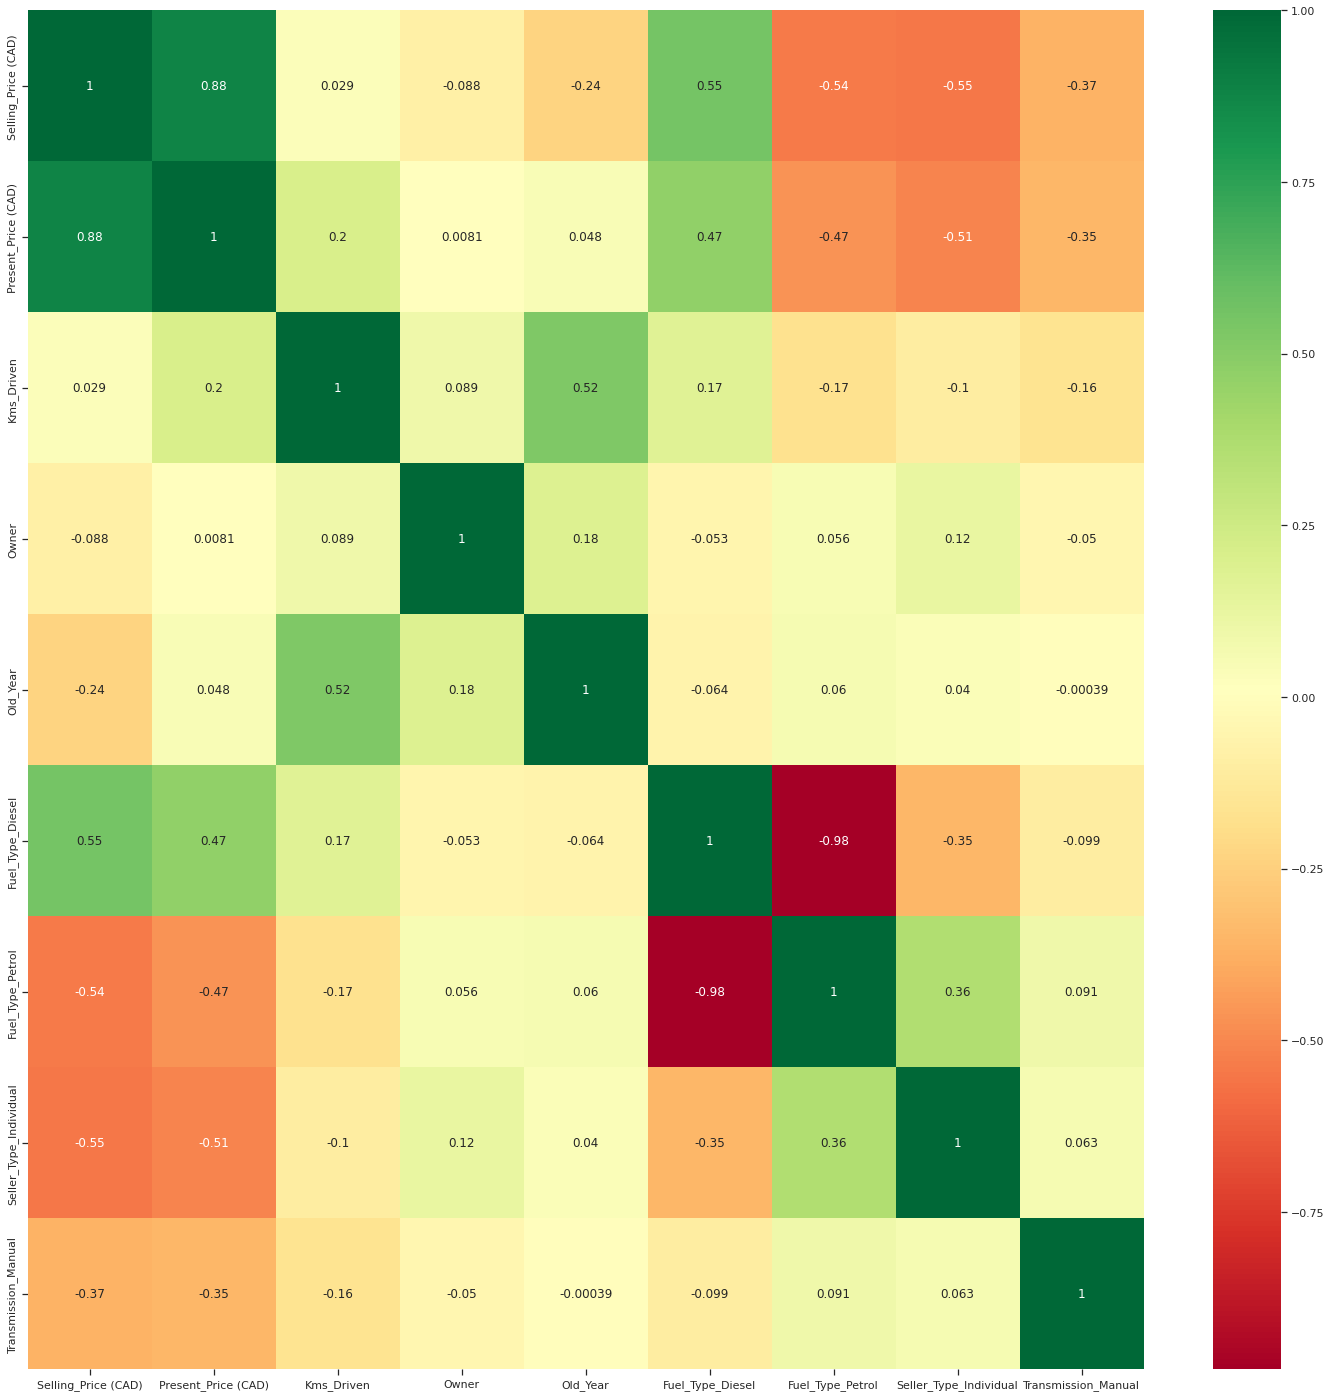

In [15]:
#visualize correlation with each and plotting heat map
res = df.corr()
x = res.index
plt.figure(figsize=(25,25))
g=sns.heatmap(df[x].corr(),annot=True,cmap="RdYlGn")

In [16]:
# Splitting data into X and Y
X=df.iloc[:,1:]
y=df.iloc[:,0]

X.head(10)     # X features

,Present_Price (CAD),Kms_Driven,Owner,Old_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9.503,27000,0,7,0,1,0,1
1,16.218,43000,0,8,1,0,0,1
2,16.745,6900,0,4,0,1,0,1
3,7.055,5200,0,10,0,1,0,1
4,11.679,42450,0,7,1,0,0,1
5,16.711,2071,0,3,1,0,0,1
6,13.804,18796,0,6,0,1,0,1
7,14.637,33429,0,6,1,0,0,1
8,15.113,20273,0,5,1,0,0,1
9,15.164,42367,0,6,1,0,0,1


In [17]:
y.head(10)       # target

0     5.695
1     8.075
2    12.325
3     4.845
4     7.820
5    15.725
6    11.475
7    11.050
8    14.875
9    12.665
Name: Selling_Price (CAD), dtype: float64

[0.41425462 0.04129736 0.00043438 0.07897375 0.2062359  0.0114295
 0.12962711 0.11774738]


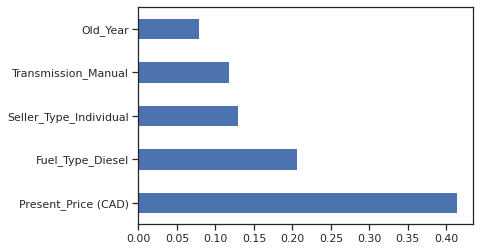

In [18]:
#An extra-trees regressor.

#This class implements a meta estimator that fits a number of randomized decision trees 
#(a.k.a. extra-trees) on various sub-samples of the dataset and use averaging 
#to improve the predictive accuracy and control over-fitting.


model = ExtraTreesRegressor()
model.fit(X,y)

#printing model's features importance
print(model.feature_importances_)

#plot graph of feature importances for better visualization
imp = pd.Series(model.feature_importances_, index=X.columns)
imp.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
# Splitting data set into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# feature scaling

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train =scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

training score:89.26
test score:85.18
RMSE:3.578945471473329


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

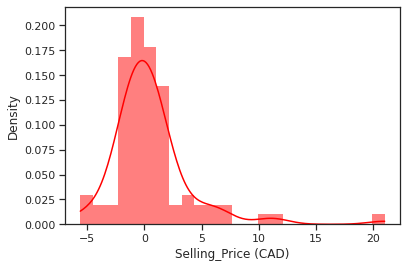

In [41]:
# Appling Linear Regression

model = LinearRegression()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

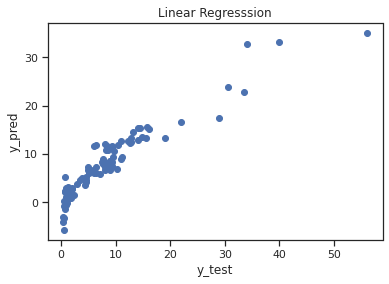

In [43]:
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regresssion')
plt.scatter(y_test,y_pred)

training score:100.0
test score:91.22
RMSE:2.7544471912845525


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

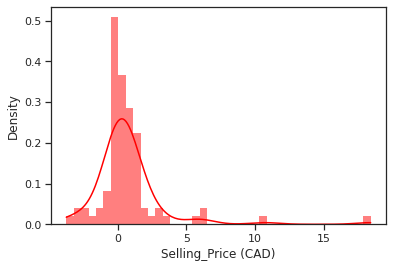

In [44]:
# Appling XGBRegressor

model = XGBRegressor()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

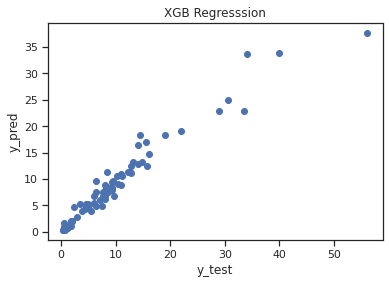

In [45]:
# Plot scatter plot XGBRegressor
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('XGB Regresssion')
plt.scatter(y_test,y_pred)

training score:100.0
test score:91.66
RMSE:2.6854986317440015


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

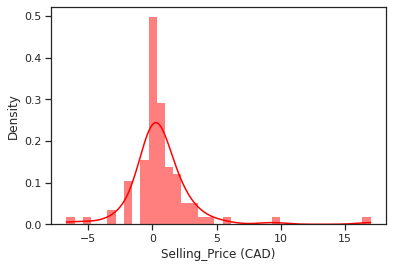

In [46]:
# Appling DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

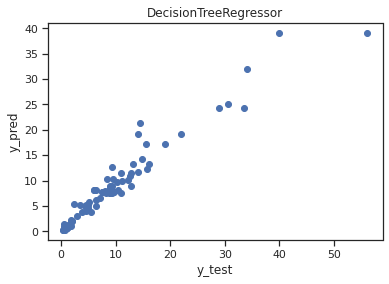

In [47]:
# Plot scatter plot DecisionTreeRegressor
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('DecisionTreeRegressor')
plt.scatter(y_test,y_pred)

training score:91.51
test score:83.35
RMSE:3.7929453235832855


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

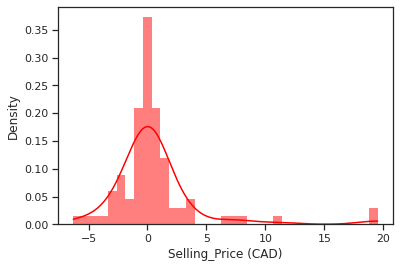

In [48]:
# Appling KNeighborsRegressor()
model = KNeighborsRegressor()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

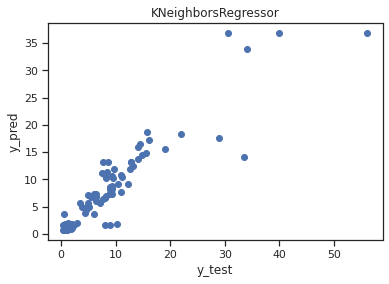

In [49]:
# Plot scatter plot KNeighborsRegressor()
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('KNeighborsRegressor')
plt.scatter(y_test,y_pred)

training score:52.29
test score:45.67
RMSE:6.8526600978832315


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

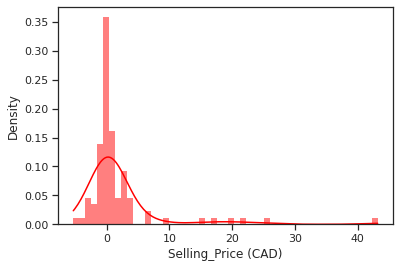

In [50]:
# Appling SVR()
model = SVR()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

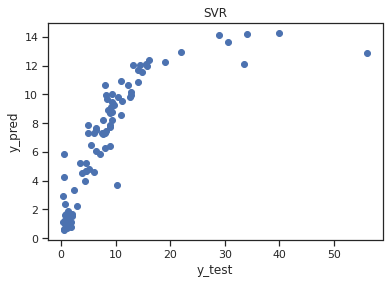

In [51]:
# Plot scatter plot SVR()
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('SVR')
plt.scatter(y_test,y_pred)

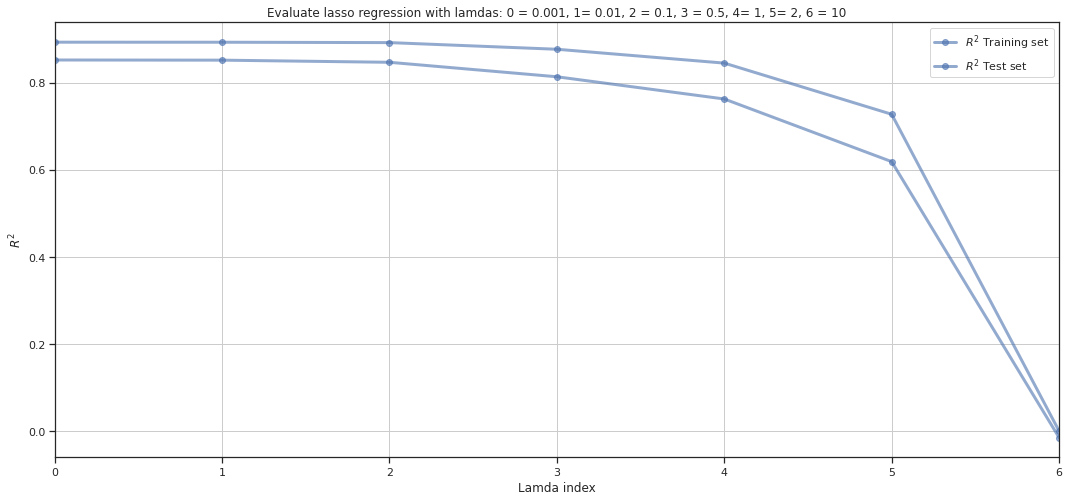

In [68]:
#define model
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

    
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-',label=r'$R^2$ Test set', alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [69]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([ 6.17343345, -0.28427578, -0.27937505, -1.80682344,  1.2682852 ,
       -0.        , -1.05705145, -0.61970295])

training score:89.17
test score:84.65
RMSE:3.6427885157313478


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

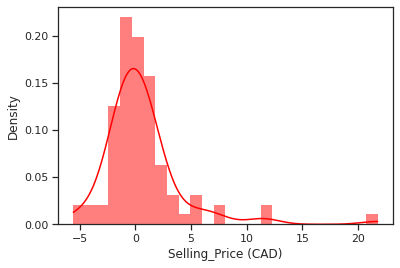

In [70]:
model = reg_best
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

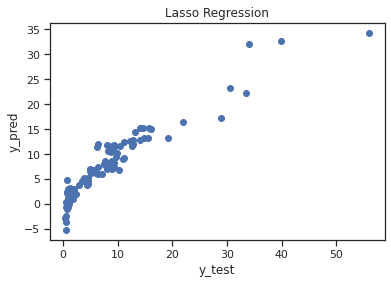

In [71]:
# Plot scatter plot Lasso Regression
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Lasso Regression')
plt.scatter(y_test,y_pred)

training score:98.54
test score:90.99
RMSE:2.7905839147236406


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

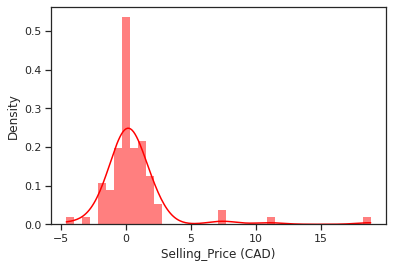

In [72]:
# Appling RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

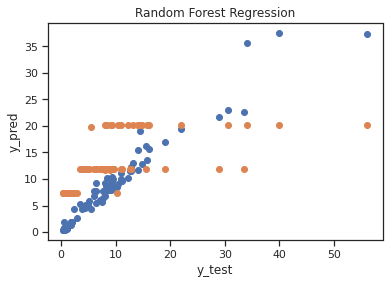

In [73]:
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest Regression')
plt.scatter(y_test,y_pred)
plt.scatter(y_test,predictions)

In [75]:
model.fit(X_train,y_train)
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

training score:98.75
test score:91.01
RMSE:2.7871548361727476


In [76]:
# Appling Ridge Regression

alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [81]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 8)

Text(0, 0.5, 'weights')

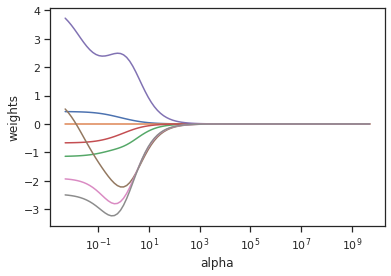

In [82]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Alpha_
0.10772173450159389
training score:88.51
test score:82.59
RMSE:3.8794893226748943


<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

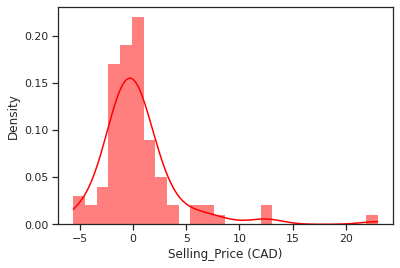

In [85]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("Alpha_")
print(ridgecv.alpha_)
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
model = ridge
print(f'training score:{round(model.score(X_train, y_train) * 100, 2)}')
print(f'test score:{round(model.score(X_test,y_test)*100,2)}')
y_pred =model.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')
sns.histplot(y_test-y_pred, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

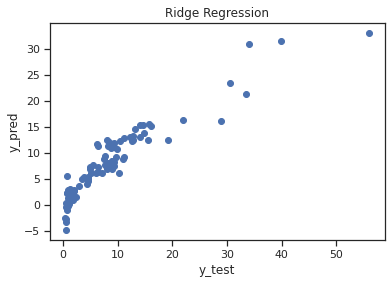

In [86]:
# Plot scatter plot Ridge Regression
# Plot scatter plot between predicted vs test value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Ridge Regression')
plt.scatter(y_test,y_pred)

In [ ]:
#We'll go with RandomForestRegressor because it has the best accuracy and a low mean square error.

In [103]:
# Applying RandomForestRegressor with RandomSearchCV to search for best hyperparameters

#A random forest is a meta estimator that fits a number of classifying decision trees on 
#various sub-samples of the dataset 
#and uses averaging to improve the predictive accuracy and control over-fitting

regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [128]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [156]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 20, cv = 5, verbose = 2, random_state = 42,n_jobs = 1)

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END max_depth=20

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [131]:
rf_random.best_score_

-10.551016639180247

<AxesSubplot:xlabel='Selling_Price (CAD)', ylabel='Density'>

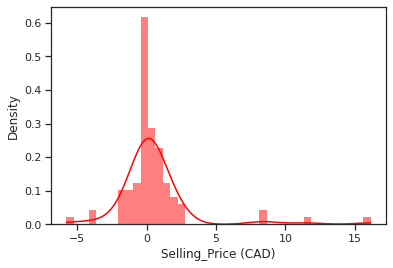

In [132]:
predictions=rf_random.predict(X_test)
sns.histplot(y_test-predictions, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

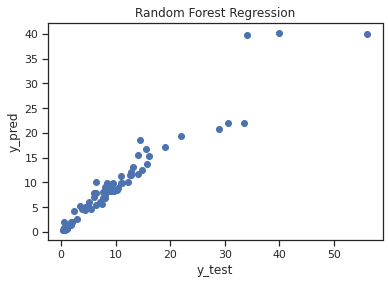

In [158]:
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest Regression')
plt.scatter(y_test,predictions)

In [137]:
# lowest RMSE among all models
y_pred =rf_random.predict(X_test)
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE:2.732303769119264


In [159]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)